In [303]:
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')

# Import data

In [304]:
corr_df = pd.read_csv('dataset/curated/correlation.csv', index_col='token')
price_df = pd.read_csv('dataset/curated/price.csv', index_col='token')
price_df.index = pd.to_datetime(price_df.index)

In [305]:
corr_df

,BTC,ETH,USDT,FTT,BNB,SOL,XRP,RUNE,LTC,LINK,...,CUSDTHALF,CUSDTHEDGE,XAUTHEDGE,ASDHALF,ETCHALF,ASDHEDGE,USDTHALF,PRIVHALF,XAUTHALF,USDTHEDGE
token,,,,,,,,,,,,,,,,,,,,,
BTC,1.000000,0.731655,0.180708,0.769954,0.568265,0.323026,0.469658,0.531982,0.767566,0.603389,...,0.095912,-0.005116,-0.062504,0.316103,0.456118,-0.316703,-0.018515,0.746492,0.071748,-0.055810
ETH,0.731655,1.000000,0.187457,0.790834,0.573285,0.485351,0.503247,0.631344,0.784416,0.751160,...,0.037352,-0.005371,-0.171990,0.253957,0.561964,-0.253597,-0.121600,0.759472,0.085078,-0.138143
USDT,0.180708,0.187457,1.000000,0.168983,0.094633,0.020305,0.065914,0.147177,0.149848,0.190058,...,0.094355,-0.062414,-0.297072,-0.018245,0.140701,0.009438,0.189519,0.088660,0.078449,-0.293757
FTT,0.769954,0.790834,0.168983,1.000000,0.806364,0.500536,0.458448,0.612795,0.710810,0.678253,...,0.061958,-0.006645,-0.147566,0.370528,0.489928,-0.367124,-0.104795,0.730923,0.051505,-0.074786
BNB,0.568265,0.573285,0.094633,0.806364,1.000000,0.453255,0.416628,0.498242,0.568252,0.540328,...,0.063891,-0.031466,-0.098469,0.357734,0.376508,-0.353150,-0.060938,0.610008,0.023484,-0.038335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASDHEDGE,-0.316703,-0.253597,0.009438,-0.367124,-0.353150,-0.258836,-0.189195,-0.182617,-0.259452,-0.233818,...,-0.011483,-0.039379,-0.042304,-0.974711,-0.146596,1.000000,0.066953,-0.298144,0.095510,0.090404
USDTHALF,-0.018515,-0.121600,0.189519,-0.104795,-0.060938,-0.156696,-0.019909,-0.065979,-0.051595,-0.079173,...,0.116438,-0.089468,0.050176,-0.045323,-0.045762,0.066953,1.000000,-0.075544,0.037583,0.030867
PRIVHALF,0.746492,0.759472,0.088660,0.730923,0.610008,0.447291,0.584404,0.560671,0.806505,0.709564,...,-0.001943,0.031214,-0.181072,0.280474,0.640414,-0.298144,-0.075544,1.000000,0.068414,-0.084163


In [306]:
price_df

,BTC,ETH,USDT,FTT,BNB,SOL,XRP,RUNE,LTC,LINK,...,CUSDTHALF,CUSDTHEDGE,XAUTHEDGE,ASDHALF,ETCHALF,ASDHEDGE,USDTHALF,PRIVHALF,XAUTHALF,USDTHEDGE
token,,,,,,,,,,,,,,,,,,,,,
2020-08-01,11816.0,387.39,1.0011,3.498,21.626,1.5275,0.290900,0.4470,61.745,8.3220,...,6113.75,5982.0,4801.5,7840.5,7612.0,2158.000,6176.75,8385.0,6749.00,5323.5
2020-08-02,11070.0,372.23,0.9994,3.351,20.985,1.7300,0.287575,0.4790,56.665,8.2640,...,6109.75,5994.0,4874.0,7811.5,7278.5,2168.500,6176.75,8119.0,6696.50,5305.5
2020-08-03,11234.0,386.30,1.0006,3.539,22.059,1.8000,0.310175,0.4560,58.550,9.2375,...,6107.75,5989.5,4834.5,8397.5,7270.0,1849.500,6177.00,8241.0,6722.00,5305.5
2020-08-04,11199.5,389.70,1.0003,3.475,22.308,1.8600,0.301325,0.5070,57.675,9.8485,...,6105.00,5989.5,4702.5,8657.0,7250.0,1735.500,6177.00,8236.0,6812.00,5305.5
2020-08-05,11756.5,401.22,1.0009,3.608,23.289,1.7575,0.302425,0.5595,58.880,9.5405,...,6106.25,5987.5,4703.0,9008.5,7309.5,1592.400,6178.75,8496.5,6810.50,5305.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,42232.0,2463.40,1.0004,34.980,322.924,32.3975,0.751950,6.3240,145.590,22.2665,...,5348.25,6521.0,4796.5,19592.0,26391.0,62.590,6170.75,15942.0,6187.50,4534.5
2021-07-31,41494.0,2533.80,1.0006,35.200,332.807,36.7125,0.745950,6.4845,144.475,22.7140,...,5344.25,6519.0,4793.0,19788.0,26484.0,61.235,6170.75,16014.0,6183.00,4531.5
2021-08-01,39847.0,2555.90,1.0004,34.929,332.783,34.1800,0.723450,5.9970,140.260,22.0680,...,5341.75,6521.5,4804.5,19975.0,26204.0,60.080,6170.75,15879.0,6177.75,4529.5


In [307]:
asset_info_df = pd.read_csv('dataset/coingeko_marketcap.csv')
asset_info_df['symbol'] = asset_info_df['symbol'].str.upper()
# asset_info_df = asset_info_df[~np.isclose(asset_info_df['market_cap'], 0)] # Drop asset that has market_cap near zero

asset_info_df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,BTC,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,44901.000000,8.432134e+11,1.0,9.429023e+11,4.360471e+10,45242.00,...,2.100000e+07,2.100000e+07,64805.00,-30.71318,2021-04-14T11:54:46.763Z,67.810000,66117.06502,2013-07-06T00:00:00.000Z,NaN,2021-08-08T08:19:02.743Z
1,ethereum,ETH,Ethereum,https://assets.coingecko.com/coins/images/279/...,3145.290000,3.680135e+11,2.0,NaN,4.126463e+10,3178.76,...,NaN,NaN,4356.99,-27.81051,2021-05-12T14:41:48.623Z,0.432979,726330.22912,2015-10-20T00:00:00.000Z,"{'times': 92.67582986335988, 'currency': 'btc'...",2021-08-08T08:19:00.968Z
2,tether,USDT,Tether,https://assets.coingecko.com/coins/images/325/...,0.999284,6.238751e+10,3.0,NaN,8.301148e+10,1.02,...,6.243224e+10,NaN,1.32,-24.47380,2018-07-24T00:00:00.000Z,0.572521,74.54096,2015-03-02T00:00:00.000Z,NaN,2021-08-08T08:06:12.204Z
3,binancecoin,BNB,Binance Coin,https://assets.coingecko.com/coins/images/825/...,355.910000,5.500251e+10,4.0,6.069732e+10,1.627925e+09,361.59,...,1.705337e+08,1.705337e+08,686.31,-48.13340,2021-05-10T07:24:17.097Z,0.039818,893884.11189,2017-10-19T00:00:00.000Z,NaN,2021-08-08T08:19:00.986Z
4,cardano,ADA,Cardano,https://assets.coingecko.com/coins/images/975/...,1.480000,4.736214e+10,5.0,6.646512e+10,2.577603e+09,1.49,...,4.500000e+10,4.500000e+10,2.45,-39.60002,2021-05-16T07:44:28.033Z,0.019253,7571.99082,2020-03-13T02:22:55.044Z,NaN,2021-08-08T08:20:05.942Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,xkncb,XKNCB,xKNCb,https://assets.coingecko.com/coins/images/1399...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,...,8.151451e+05,NaN,NaN,0.00000,NaN,NaN,0.00000,NaN,NaN,2021-08-04T06:39:01.434Z
6039,imusd,IMUSD,imUSD,https://assets.coingecko.com/coins/images/1369...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,0.00000,NaN,NaN,0.00000,NaN,NaN,2021-08-06T14:30:29.182Z
6040,wallstreetbets-coin,WSBC,WallStreetBets Coin,https://assets.coingecko.com/coins/images/1608...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00000,NaN,NaN,0.00000,NaN,NaN,NaN
6041,dexlab,DXL,Dexlab,https://assets.coingecko.com/coins/images/1727...,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+09,NaN,NaN,0.00000,NaN,NaN,0.00000,NaN,NaN,NaN


In [308]:
market_cap_df = pd.DataFrame(corr_df.index.tolist(), columns=['symbol'])
market_cap_df = market_cap_df.merge(asset_info_df[['symbol', 'market_cap']],
                    how='left', 
                    on='symbol'
                   )
market_caps = market_cap_df.set_index('symbol')['market_cap']
market_caps

symbol
BTC          8.432134e+11
ETH          3.680135e+11
USDT         6.238751e+10
FTT          4.840712e+09
BNB          5.500251e+10
                 ...     
ASDHEDGE              NaN
USDTHALF              NaN
PRIVHALF              NaN
XAUTHALF              NaN
USDTHEDGE             NaN
Name: market_cap, Length: 186, dtype: float64

## Filter only selected assets

In [309]:
ASSETS = ['BTC', 'ETH', 'FTT', 'BNB',
          'SOL', 'XRP', 'RUNE', 'LTC', 
          'LINK', 'BCH', 'SXP', 'COMP', 
          'TRYB', 'YFI', 'MKR', 'TRX', 
          'PAXG', 'AMPL', 'KNC', 'BAL', 
          'MTA', 'WRX', 'ASD', 'DMG'
         ]


In [310]:
corr_df = corr_df.loc[corr_df.index.isin(ASSETS), corr_df.columns.isin(ASSETS)] # Filter only selected assets
corr_df

,BTC,ETH,FTT,BNB,SOL,XRP,RUNE,LTC,LINK,BCH,...,MKR,TRX,PAXG,AMPL,KNC,BAL,MTA,WRX,ASD,DMG
token,,,,,,,,,,,,,,,,,,,,,
BTC,1.000000,0.731655,0.769954,0.568265,0.323026,0.469658,0.531982,0.767566,0.603389,0.668583,...,0.495851,0.558160,0.107543,0.357824,0.538630,0.512722,0.357690,0.385868,0.324001,-0.052837
ETH,0.731655,1.000000,0.790834,0.573285,0.485351,0.503247,0.631344,0.784416,0.751160,0.725200,...,0.682646,0.618866,0.083702,0.465284,0.619166,0.680976,0.504731,0.446072,0.262740,-0.046978
FTT,0.769954,0.790834,1.000000,0.806364,0.500536,0.458448,0.612795,0.710810,0.678253,0.635101,...,0.551863,0.575369,0.102842,0.405463,0.609839,0.589579,0.431081,0.481828,0.377098,-0.071597
BNB,0.568265,0.573285,0.806364,1.000000,0.453255,0.416628,0.498242,0.568252,0.540328,0.508774,...,0.446169,0.488075,0.033182,0.292251,0.531288,0.411198,0.298713,0.446704,0.369007,-0.071539
SOL,0.323026,0.485351,0.500536,0.453255,1.000000,0.339221,0.495796,0.379898,0.476556,0.328554,...,0.383929,0.344261,0.034660,0.263212,0.414664,0.430537,0.335723,0.291558,0.300276,-0.031827
XRP,0.469658,0.503247,0.458448,0.416628,0.339221,1.000000,0.354629,0.573773,0.491401,0.553836,...,0.391670,0.551128,0.003663,0.202101,0.490032,0.376152,0.265655,0.320908,0.209076,-0.045194
RUNE,0.531982,0.631344,0.612795,0.498242,0.495796,0.354629,1.000000,0.550695,0.651004,0.486166,...,0.469116,0.478460,0.097282,0.334500,0.532433,0.584570,0.445314,0.354087,0.192602,-0.025549
LTC,0.767566,0.784416,0.710810,0.568252,0.379898,0.573773,0.550695,1.000000,0.703099,0.806718,...,0.536028,0.614780,0.114223,0.390369,0.618476,0.549180,0.411410,0.411748,0.260726,-0.086417
LINK,0.603389,0.751160,0.678253,0.540328,0.476556,0.491401,0.651004,0.703099,1.000000,0.659856,...,0.594556,0.561571,0.058617,0.376956,0.650913,0.679851,0.487030,0.409645,0.246547,-0.024721


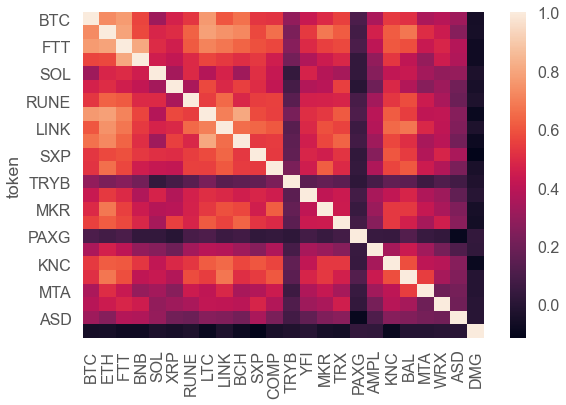

In [311]:
plt.subplots(figsize=(9, 6))
sns.heatmap(corr_df)

In [312]:
price_df = price_df.loc[:, price_df.columns.isin(ASSETS)] # Filter only selected assets
price_df

,BTC,ETH,FTT,BNB,SOL,XRP,RUNE,LTC,LINK,BCH,...,MKR,TRX,PAXG,AMPL,KNC,BAL,MTA,WRX,ASD,DMG
token,,,,,,,,,,,,,,,,,,,,,
2020-08-01,11816.0,387.39,3.498,21.626,1.5275,0.290900,0.4470,61.745,8.3220,319.550,...,592.5,0.020485,1983.7,1.3775,1.4817,10.7200,5.0000,0.12420,0.05624,1.129
2020-08-02,11070.0,372.23,3.351,20.985,1.7300,0.287575,0.4790,56.665,8.2640,283.650,...,568.5,0.019072,1987.3,1.0200,1.4090,10.2125,4.4240,0.12127,0.05730,1.068
2020-08-03,11234.0,386.30,3.539,22.059,1.8000,0.310175,0.4560,58.550,9.2375,296.900,...,591.0,0.019903,1986.4,0.8955,1.3858,10.4475,5.2040,0.12250,0.06555,1.085
2020-08-04,11199.5,389.70,3.475,22.308,1.8600,0.301325,0.5070,57.675,9.8485,288.000,...,583.5,0.020383,2035.0,0.7895,1.4794,10.3775,5.5190,0.12324,0.06993,1.150
2020-08-05,11756.5,401.22,3.608,23.289,1.7575,0.302425,0.5595,58.880,9.5405,293.675,...,591.0,0.020315,2051.6,0.8058,1.5309,9.9900,4.8730,0.12826,0.07553,1.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,42232.0,2463.40,34.980,322.924,32.3975,0.751950,6.3240,145.590,22.2665,552.725,...,2916.0,0.063207,1822.6,0.8888,1.5678,20.6125,0.7535,1.13580,0.35202,0.047
2021-07-31,41494.0,2533.80,35.200,332.807,36.7125,0.745950,6.4845,144.475,22.7140,546.500,...,2977.5,0.063922,1820.9,0.9736,1.6307,21.7525,0.7960,1.12798,0.35868,0.048
2021-08-01,39847.0,2555.90,34.929,332.783,34.1800,0.723450,5.9970,140.260,22.0680,526.925,...,2885.5,0.063260,1815.6,1.0180,1.5573,21.2425,0.8030,1.08387,0.36573,0.046


In [313]:
market_caps = market_caps.loc[ASSETS] # Filter only selected assets
market_caps

symbol
BTC     8.432134e+11
ETH     3.680135e+11
FTT     4.840712e+09
BNB     5.500251e+10
SOL     1.060715e+10
XRP     3.821842e+10
RUNE    1.990675e+09
LTC     1.037442e+10
LINK    1.094700e+10
BCH     1.091427e+10
SXP     2.258085e+08
COMP    2.698483e+09
TRYB    7.966098e+07
YFI     1.225168e+09
MKR     3.068436e+09
TRX     5.419969e+09
PAXG    2.977072e+08
AMPL    2.103903e+08
KNC     1.799069e+08
BAL     2.784054e+08
MTA     2.944088e+07
WRX     5.523514e+08
ASD     2.766178e+08
DMG     2.586578e+06
Name: market_cap, dtype: float64

# Experiment 
## Reverse market cap

In [314]:
market_cap_df['market_cap'] = market_cap_df['market_cap'].to_numpy()[::-1]
market_cap_df

,symbol,market_cap
0,BTC,NaN
1,ETH,NaN
2,USDT,NaN
3,FTT,NaN
4,BNB,NaN
...,...,...
181,ASDHEDGE,5.500251e+10
182,USDTHALF,4.840712e+09
183,PRIVHALF,6.238751e+10
184,XAUTHALF,3.680135e+11


# Asset allocation

In [315]:
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier

## Use BTC as market index

In [316]:
market_index_prices = price_df['BTC']
delta = black_litterman.market_implied_risk_aversion(market_index_prices, frequency=len(price_df))
prior = black_litterman.market_implied_prior_returns(market_caps, delta, corr_df)

In [317]:
delta

2.4019056249836903

In [318]:
prior

token
BTC     2.124227
ETH     1.913624
FTT     1.850614
BNB     1.414476
SOL     0.934430
XRP     1.200430
RUNE    1.348651
LTC     1.831880
LINK    1.558693
BCH     1.637712
SXP     1.324307
COMP    1.354731
TRYB    0.645442
YFI     1.121618
MKR     1.324227
TRX     1.393403
PAXG    0.245293
AMPL    0.929690
KNC     1.363627
BAL     1.344131
MTA     0.966427
WRX     0.987852
ASD     0.748195
DMG    -0.104317
dtype: float64

In [319]:

bl = BlackLittermanModel(corr_df,
                         Q=np.zeros(len(ASSETS),),
                         pi='market',
                          market_caps=market_caps,
                         risk_aversion=delta
                        )

In [320]:
pd.Series(bl.clean_weights())

AttributeError: Weights not yet computed

## Optimize performance 

maximize sharpe ratio with effient frontier

In [321]:
from pypfopt import EfficientFrontier, objective_functions

In [322]:
ef = EfficientFrontier(prior, corr_df.values)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()

asset_weights = pd.Series(ef.clean_weights())
asset_weights

/usr/local/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:252: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


BTC     0.20816
ETH     0.10693
FTT     0.09211
BNB     0.04141
SOL     0.00142
XRP     0.03415
RUNE    0.03282
LTC     0.08892
LINK    0.03663
BCH     0.06161
SXP     0.02004
COMP    0.02720
TRYB    0.03217
YFI     0.01746
MKR     0.03225
TRX     0.03710
PAXG    0.00941
AMPL    0.02438
KNC     0.02089
BAL     0.02568
MTA     0.01184
WRX     0.01477
ASD     0.02265
DMG     0.00000
dtype: float64

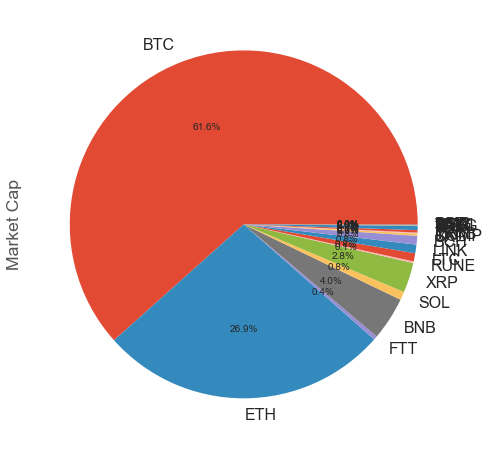

In [323]:
market_caps.plot(kind='pie',
                 figsize=(8, 8),
                 autopct='%1.1f%%',
                 label='Market Cap'
                )

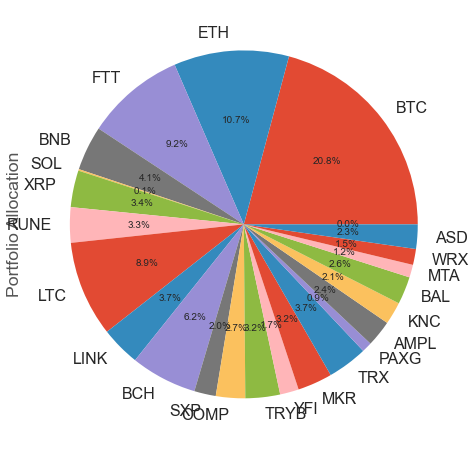

In [324]:
asset_weights.plot(kind='pie',
                   figsize=(8, 8),
                   autopct='%1.1f%%',
                   label='Portfolio Allocation'
                  )

In [325]:
class Portfolio:
    def __init__(self, price_df, asset_weights):
        self.price_df = price_df
        self.asset_weights = asset_weights
        
        self.calculate_portfolio_value()
    def calculate_portfolio_value(self):
        init_price = self.price_df.iloc[0]
        self.position_sizes = self.asset_weights / init_price
        
        self.asset_values = self.price_df * self.position_sizes
        self.portfolio_values = self.asset_values.sum(axis=1)
        
    def plot_value(self, name=None, **kwargs):
        ax = self.portfolio_values.plot(**kwargs)
        if name:
            if ax.get_legend():
                print(ax.get_legend().get_texts())
                legend_texts = list(map(lambda text: text.get_text(), ax.get_legend().get_texts()))
                legend_texts.append(name)
                ax.legend(legend_texts)
            else:
                ax.legend([name])
        return ax
    
    def plot_value_area(self, **kwargs):
        self.asset_values.plot.area(**kwargs)

In [326]:
buy_hold_btc_weights = pd.Series(np.zeros(len(ASSETS)), index=ASSETS)
buy_hold_btc_weights.loc['BTC'] = 1.0
buy_hold_btc_weights

BTC     1.0
ETH     0.0
FTT     0.0
BNB     0.0
SOL     0.0
XRP     0.0
RUNE    0.0
LTC     0.0
LINK    0.0
BCH     0.0
SXP     0.0
COMP    0.0
TRYB    0.0
YFI     0.0
MKR     0.0
TRX     0.0
PAXG    0.0
AMPL    0.0
KNC     0.0
BAL     0.0
MTA     0.0
WRX     0.0
ASD     0.0
DMG     0.0
dtype: float64

<a list of 1 Text objects>


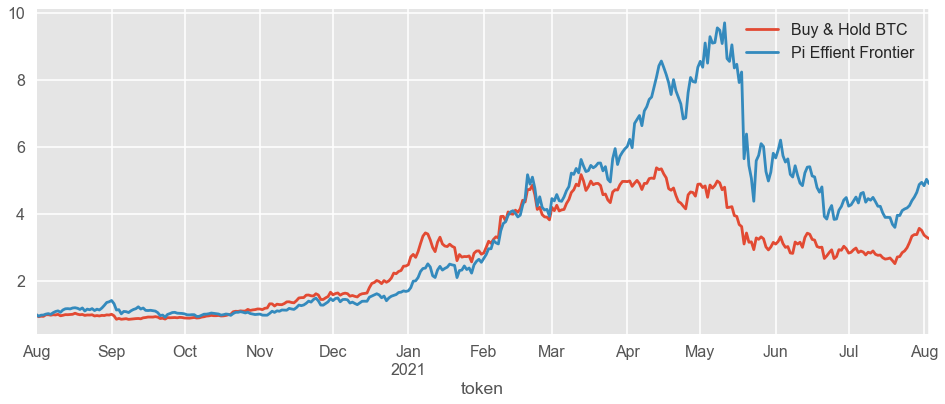

In [327]:
pi_effient_frontier_portfolio = Portfolio(price_df, asset_weights)
buy_hold_btc_portfolio = Portfolio(price_df, buy_hold_btc_weights)

ax = buy_hold_btc_portfolio.plot_value(name='Buy & Hold BTC', figsize=(16, 6))
ax = pi_effient_frontier_portfolio.plot_value(name='Pi Effient Frontier', figsize=(16, 6), ax=ax)

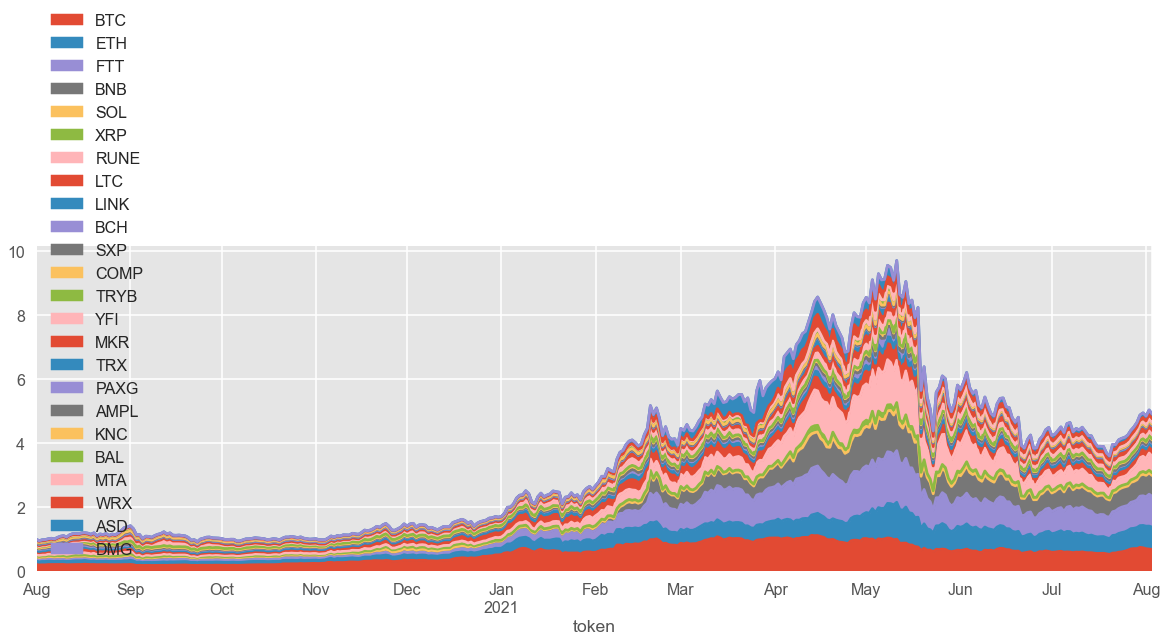

In [328]:
with plt.style.context('seaborn-poster'):
    pi_effient_frontier_portfolio.plot_value_area(figsize=(20, 6), )